# Deep Learning Playground

This notebook demonstrates:
1. **MLP** for tabular data
2. **CNN** for image data
3. **Simple RNN**, **LSTM**, and **GRU** for sequence data

Feel free to adjust hyper‑parameters and architectures to deepen your understanding!

In [93]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, tensorflow as tf
from tensorflow.keras import layers, models
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.19.0


## Part 1 – MLP on Titanic

In [94]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
titanic = titanic.drop(['Cabin','Ticket','Name','Embarked'], axis=1)
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Sex'] = titanic['Sex'].map({'male':0,'female':1})
titanic.dropna(inplace=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = titanic[['Pclass','Sex','Age','Fare']].values
y = titanic['Survived'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

C:\Users\denis\AppData\Local\Temp\ipykernel_29904\1585004622.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [95]:
mlp = models.Sequential([layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
                          layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation='sigmoid')])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.summary()

c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

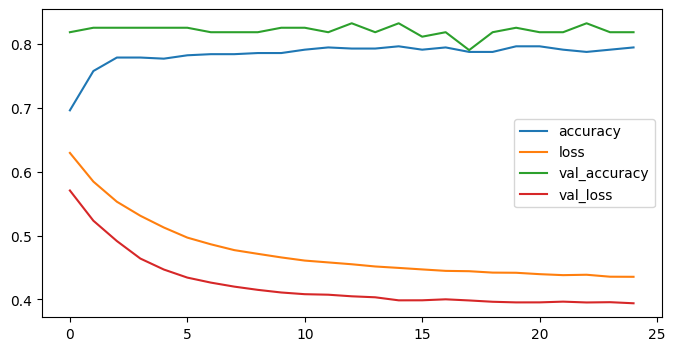

Test accuracy: 0.7821229100227356


In [96]:
hist = mlp.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_split=0.2, verbose=0)
pd.DataFrame(hist.history).plot(figsize=(8,4)); plt.show()
print('Test accuracy:', mlp.evaluate(X_test, y_test, verbose=0)[1])

## Part 2 – CNN on MNIST

In [97]:
(X_train_m, y_train_m), (X_test_m, y_test_m) = tf.keras.datasets.mnist.load_data()
X_train_m = X_train_m.astype('float32')/255.
X_test_m = X_test_m.astype('float32')/255.
X_train_m = X_train_m[...,None]
X_test_m = X_test_m[...,None]

In [98]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
cnn.fit(X_train_m, y_train_m, epochs=5, batch_size=128,
        validation_split=0.1, verbose=2)
print('Test accuracy:', cnn.evaluate(X_test_m, y_test_m, verbose=0)[1])

Epoch 1/5
422/422 - 11s - 27ms/step - accuracy: 0.9376 - loss: 0.2219 - val_accuracy: 0.9843 - val_loss: 0.0596
Epoch 2/5
422/422 - 9s - 22ms/step - accuracy: 0.9820 - loss: 0.0585 - val_accuracy: 0.9885 - val_loss: 0.0454
Epoch 3/5
422/422 - 10s - 23ms/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9900 - val_loss: 0.0363
Epoch 4/5
422/422 - 10s - 24ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9875 - val_loss: 0.0390
Epoch 5/5
422/422 - 10s - 23ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9903 - val_loss: 0.0345
Test accuracy: 0.9898999929428101


## Part 3 – RNNs for Time Series

We'll forecast a sine wave using previous 50 time‑steps.

In [100]:
t = np.linspace(0, 100, 10000)
series = np.sin(t)
window=50
X_seq, y_seq = [], []
for i in range(len(series)-window):
    X_seq.append(series[i:i+window])
    y_seq.append(series[i+window])
X_seq, y_seq = np.array(X_seq)[...,None], np.array(y_seq)
split=int(0.8*len(X_seq))
X_train_s, X_test_s = X_seq[:split], X_seq[split:]
y_train_s, y_test_s = y_seq[:split], y_seq[split:]
print(X_train_s.shape)

(7960, 50, 1)


### Simple RNN

In [101]:
rnn = models.Sequential([layers.SimpleRNN(32, input_shape=(window,1)),
                        layers.Dense(1)])
rnn.compile(optimizer='adam', loss='mse')
rnn.summary()
rnn.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('RNN Test MSE:', rnn.evaluate(X_test_s, y_test_s, verbose=0))

c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 2s - 27ms/step - loss: 0.0150 - val_loss: 2.4531e-04
Epoch 2/5
56/56 - 0s - 7ms/step - loss: 1.3331e-04 - val_loss: 8.7594e-05
Epoch 3/5
56/56 - 0s - 7ms/step - loss: 7.5804e-05 - val_loss: 5.2151e-05
Epoch 4/5
56/56 - 0s - 7ms/step - loss: 4.7911e-05 - val_loss: 3.4719e-05
Epoch 5/5
56/56 - 0s - 7ms/step - loss: 3.0829e-05 - val_loss: 2.1229e-05
RNN Test MSE: 2.522429531381931e-05


### LSTM

In [102]:
lstm = models.Sequential([layers.LSTM(64, input_shape=(window,1)),
                         layers.Dense(1)])
lstm.compile(optimizer='adam', loss='mse')
lstm.summary()
lstm.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('LSTM Test MSE:', lstm.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 3s - 50ms/step - loss: 0.0428 - val_loss: 0.0028
Epoch 2/5
56/56 - 1s - 27ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 3/5
56/56 - 1s - 26ms/step - loss: 8.7605e-04 - val_loss: 3.5072e-04
Epoch 4/5
56/56 - 1s - 26ms/step - loss: 1.1705e-04 - val_loss: 3.7670e-05
Epoch 5/5
56/56 - 1s - 26ms/step - loss: 2.7101e-05 - val_loss: 2.1706e-05
LSTM Test MSE: 2.3268456061487086e-05


### GRU

In [103]:
gru = models.Sequential([layers.GRU(64, input_shape=(window,1)),
                        layers.Dense(1)])
gru.compile(optimizer='adam', loss='mse')
gru.summary()
gru.fit(X_train_s, y_train_s, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('GRU Test MSE:', gru.evaluate(X_test_s, y_test_s, verbose=0))

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
56/56 - 3s - 56ms/step - loss: 0.1087 - val_loss: 0.0011
Epoch 2/5
56/56 - 1s - 26ms/step - loss: 7.6848e-04 - val_loss: 6.0942e-04
Epoch 3/5
56/56 - 1s - 26ms/step - loss: 5.9159e-04 - val_loss: 5.5481e-04
Epoch 4/5
56/56 - 1s - 26ms/step - loss: 5.3598e-04 - val_loss: 4.8414e-04
Epoch 5/5
56/56 - 1s - 26ms/step - loss: 4.8692e-04 - val_loss: 4.5595e-04
GRU Test MSE: 0.00045591569505631924


## Visualizing MNIST Data

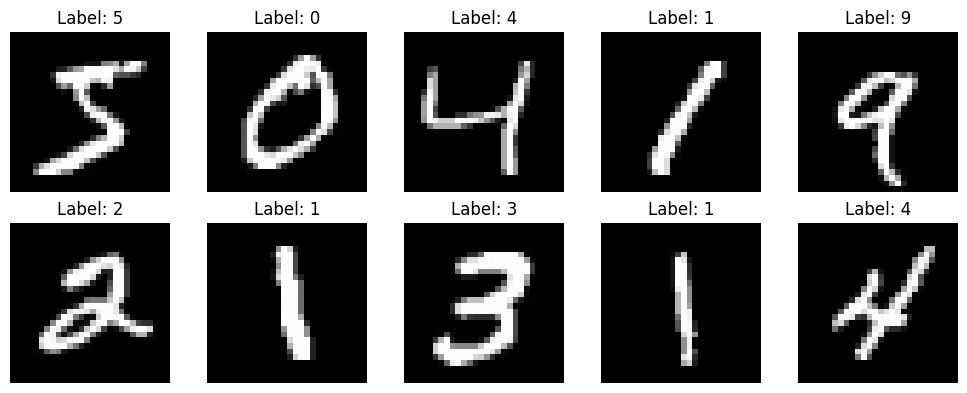

In [104]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_mnist[i], cmap='gray')
    ax.set_title(f"Label: {y_train_mnist[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

## Visualizing Model Predictions

In [105]:
def plot_predictions(images, true_labels, pred_labels, num=10):
    import numpy as np
    plt.figure(figsize=(15, 4))
    for i in range(num):
        plt.subplot(2, num//2, i+1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(f"T: {true_labels[i]}, P: {pred_labels[i]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## Exercises

#### 1. Change the Activation Function
Try using `tanh`, `sigmoid`, or `leaky_relu` instead of `relu`. How does it affect training?

#### 2. Add Dropout
Add `Dropout(0.3)` after dense or convolutional layers. Does it help reduce overfitting?

#### 3. Train a CNN on a New Image Dataset
Choose a public dataset: **CIFAR-10**,  and train a CNN model. You can load it using Keras:
```python
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```

### 4. Train an LSTM for Text Processing
Choose a small text dataset (e.g., IMDB movie reviews from Keras).
👉 Tokenize the data, pad the sequences, and use an `Embedding` + `LSTM` model to classify text.

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)
```
👉 Build and train a sequential model using `Embedding` + `LSTM` + `Dense`.

---
 *Tip:* For each dataset, remember to normalize inputs, convert labels to one-hot encoding if needed, and evaluate accuracy and loss.


# 1

In [106]:
mlp_tanh = models.Sequential([
    layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])
mlp_tanh.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_tanh = mlp_tanh.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=0)


print('Test accuracy with relu:', mlp.evaluate(X_test, y_test, verbose=0)[1],'\n')
print('Test accuracy with tanh:', mlp_tanh.evaluate(X_test, y_test, verbose=0)[1])

c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test accuracy with relu: 0.7821229100227356 

Test accuracy with tanh: 0.8212290406227112


Tanh performe légèrement mieux que ReLU sur ce dataset Titanic. La différence est est de 4%, mais tanh semble mieux adaptée ici.

# 2

In [108]:
mlp_dropout = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
mlp_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_dropout = mlp_dropout.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=0)

print('Test accuracy without dropout:', mlp.evaluate(X_test, y_test, verbose=0)[1])
print('Test accuracy with dropout:', mlp_dropout.evaluate(X_test, y_test, verbose=0)[1])

Test accuracy without dropout: 0.7821229100227356
Test accuracy with dropout: 0.7653631567955017


Le dropout réduit légèrement les performances d'eniron 1.7%. Sur ce dataset, le dropout n'améliore pas et peut nuire aux performances en désactivant trop de neurones pendant l'entraînement.

# 3

In [109]:
from tensorflow.keras.datasets import cifar10
(X_train_c, y_train_c), (X_test_c, y_test_c) = cifar10.load_data()
X_train_c = X_train_c.astype('float32')/255
X_test_c = X_test_c.astype('float32')/255
X_train_c = X_train_c[..., None]
X_test_c = X_test_c[..., None]

cnn_cifar = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_cifar.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_cifar.summary()
cnn_cifar.fit(X_train_c, y_train_c, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('Test accuracy:', cnn_cifar.evaluate(X_test_c, y_test_c, verbose=0)[1])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
352/352 - 12s - 33ms/step - accuracy: 0.4390 - loss: 1.5605 - val_accuracy: 0.5570 - val_loss: 1.2729
Epoch 2/5
352/352 - 10s - 28ms/step - accuracy: 0.5702 - loss: 1.2200 - val_accuracy: 0.5982 - val_loss: 1.1618
Epoch 3/5
352/352 - 10s - 28ms/step - accuracy: 0.6272 - loss: 1.0675 - val_accuracy: 0.6294 - val_loss: 1.0415
Epoch 4/5
352/352 - 10s - 29ms/step - accuracy: 0.6538 - loss: 0.9972 - val_accuracy: 0.6504 - val_loss: 1.0178
Epoch 5/5
352/352 - 10s - 28ms/step - accuracy: 0.6818 - loss: 0.9180 - val_accuracy: 0.6754 - val_loss: 0.9473
Test accuracy: 0.6669999957084656


# 4

In [110]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

lstm_text = Sequential([
    Embedding(10000, 64, input_length=100),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
lstm_text.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_text.summary()
lstm_text.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)
print('Test accuracy:', lstm_text.evaluate(X_test, y_test, verbose=0)[1])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


c:\Users\denis\Desktop\Cours\SDV\modules\DataScience\Cours-Data-Science-M2\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
176/176 - 10s - 57ms/step - accuracy: 0.7713 - loss: 0.4712 - val_accuracy: 0.8424 - val_loss: 0.3494
Epoch 2/5
176/176 - 7s - 40ms/step - accuracy: 0.8938 - loss: 0.2722 - val_accuracy: 0.8496 - val_loss: 0.3498
Epoch 3/5
176/176 - 7s - 37ms/step - accuracy: 0.9252 - loss: 0.2065 - val_accuracy: 0.8396 - val_loss: 0.4123
Epoch 4/5
176/176 - 7s - 37ms/step - accuracy: 0.9411 - loss: 0.1625 - val_accuracy: 0.8272 - val_loss: 0.5095
Epoch 5/5
176/176 - 7s - 37ms/step - accuracy: 0.9544 - loss: 0.1287 - val_accuracy: 0.8148 - val_loss: 0.5597
Test accuracy: 0.8280799984931946
